In [32]:
import pandas as pd
import numpy as np
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples for the dataset
num_samples = 90000

# Transaction-level features
transaction_amount = np.random.lognormal(mean=3, sigma=1, size=num_samples)
transaction_time = np.random.randint(0, 86400, num_samples)
transaction_location = np.random.choice(["New York", "London", "Tokyo", "Delhi", "Paris"], num_samples)
merchant_category = np.random.choice(["Electronics", "Grocery", "Travel", "Dining", "Clothing"], num_samples)
is_foreign_currency = np.random.choice([0, 1], num_samples, p=[0.9, 0.1])

# Cardholder behavior features
velocity = np.random.randint(1, 10, num_samples)
avg_transaction_amount = np.random.lognormal(mean=3, sigma=0.5, size=num_samples)
transaction_frequency = np.random.randint(1, 20, num_samples)
declined_transactions = np.random.randint(0, 5, num_samples)
time_diff_from_last_txn = np.random.exponential(scale=300, size=num_samples)
distance_from_last_location = np.random.uniform(0, 5000, num_samples)

# Cardholder demographics
cardholder_age = np.random.randint(18, 80, num_samples)

# Merchant-level features
is_blacklisted_merchant = np.random.choice([0, 1], num_samples, p=[0.95, 0.05])

# Fraudulent class
fraudulent_class = np.random.choice([0, 1], num_samples, p=[0.98, 0.02])

# Combine all features into a DataFrame
dummy_data = pd.DataFrame({
    "TransactionAmount": transaction_amount.round(2),
    "TransactionTime": transaction_time,
    "TransactionLocation": transaction_location,
    "MerchantCategoryCode": merchant_category,
    "IsForeignCurrency": is_foreign_currency,
    "Velocity": velocity,
    "AvgTransactionAmount": avg_transaction_amount.round(2),
    "TransactionFrequency": transaction_frequency,
    "DeclinedTransactionsLast24h": declined_transactions,
    "TimeDifferenceFromLastTxn": time_diff_from_last_txn.round(2),
    "DistanceFromLastLocation": distance_from_last_location.round(2),
    "CardholderAge": cardholder_age,
    "IsBlacklistedMerchant": is_blacklisted_merchant,
    "Class": fraudulent_class
})

# Generate three additional parameters for the dataset

# Transaction Risk Score: A synthetic score to represent the risk level (0 to 100 scale)
transaction_risk_score = np.random.randint(0, 101, num_samples)

# Merchant Transaction Volume: Simulate the number of daily transactions for the merchant (1 to 1000)
merchant_transaction_volume = np.random.randint(1, 1001, num_samples)

# Cardholder Tenure: Duration in years since the cardholder opened the account (1 to 20 years)
cardholder_tenure = np.random.randint(1, 21, num_samples)

# Add additional features (V15 to V28)
dummy_data['V15'] = np.log(dummy_data['TransactionAmount'] + 1)
dummy_data['V16'] = dummy_data['TransactionAmount'] / (dummy_data['AvgTransactionAmount'] + 1)
dummy_data['V17'] = dummy_data['Velocity'] * dummy_data['TransactionFrequency']
dummy_data['V18'] = dummy_data['IsForeignCurrency'] * dummy_data['IsBlacklistedMerchant']
dummy_data['V19'] = dummy_data['DistanceFromLastLocation'] / (dummy_data['TimeDifferenceFromLastTxn'] + 1)
dummy_data['V20'] = dummy_data['TransactionFrequency'] / (dummy_data['DeclinedTransactionsLast24h'] + 1)
dummy_data['V21'] = dummy_data['TransactionAmount'] / (dummy_data['CardholderAge'] + 1)
dummy_data['V22'] = np.sqrt(dummy_data['DistanceFromLastLocation'])
dummy_data['V23'] = dummy_data['DeclinedTransactionsLast24h'] * dummy_data['IsBlacklistedMerchant']
dummy_data['V24'] = dummy_data['TimeDifferenceFromLastTxn'] / (dummy_data['Velocity'] + 1)
dummy_data['V25'] = np.log1p(dummy_data['AvgTransactionAmount'])
dummy_data['V26'] = dummy_data['TransactionAmount'] * dummy_data['IsForeignCurrency']
dummy_data['V27'] = dummy_data['TransactionAmount'] * dummy_data['TransactionFrequency']
dummy_data['V28'] = dummy_data['DistanceFromLastLocation'] * dummy_data['IsBlacklistedMerchant']

dummy_data["TransactionRiskScore"] = transaction_risk_score
dummy_data["MerchantTransactionVolume"] = merchant_transaction_volume
dummy_data["CardholderTenure"] = cardholder_tenure

# Save to CSV for inspection
# Set the path to save the file
file_path = '/content/drive/MyDrive/MAJOR PROJECT/data/Dummy/Dummy_credit_card_data.csv'

# Save the DataFrame as a CSV file to Google Drive
dummy_data.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to /content/drive/MyDrive/MAJOR PROJECT/data/Dummy/Dummy_credit_card_data.csv


In [22]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data=pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/data/Dummy/Dummy_credit_card_data.csv')

In [34]:
len(data)

90000

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset (if not already loaded)
data = pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/data/Dummy/Dummy_credit_card_data.csv')

# Identify categorical columns
categorical_cols = ['TransactionLocation', 'MerchantCategoryCode']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Now your 'data' DataFrame has label-encoded categorical columns
print(data.head()) # Print the first few rows to see the changes

   TransactionAmount  TransactionTime  TransactionLocation  \
0              33.01            51872                    3   
1              17.49            21912                    2   
2              38.39            22166                    4   
3              92.11             1176                    1   
4              15.89            39895                    3   

   MerchantCategoryCode  IsForeignCurrency  Velocity  AvgTransactionAmount  \
0                     3                  0         3                 32.68   
1                     1                  0         8                 21.36   
2                     3                  1         4                  6.00   
3                     4                  0         8                 19.09   
4                     0                  0         5                 22.85   

   TransactionFrequency  DeclinedTransactionsLast24h  \
0                    18                            1   
1                    17                       

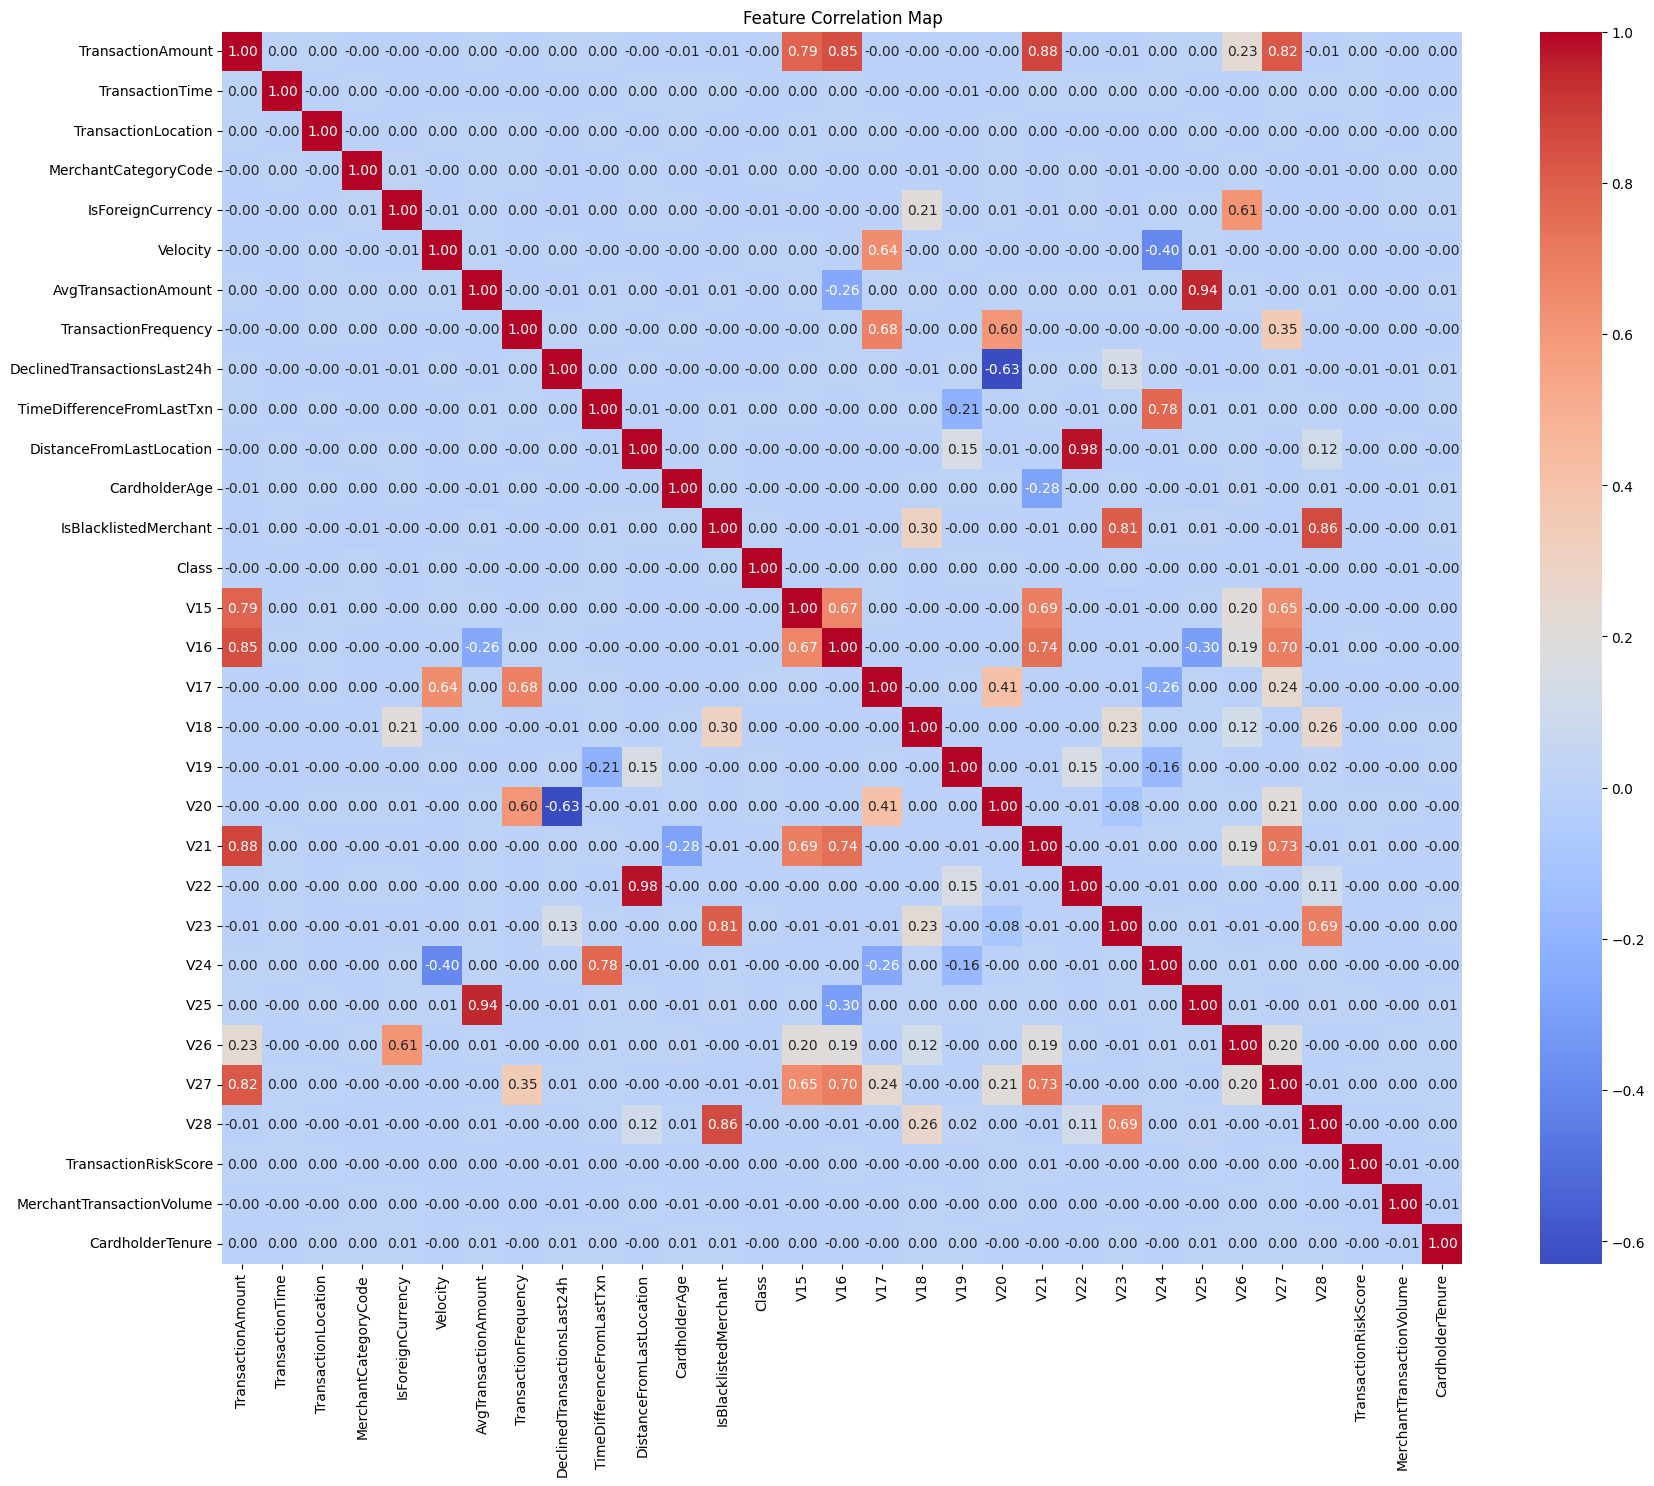

In [36]:
# prompt: i want to generate feature correlation map of above final label encoded dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Map')
plt.show()

In [37]:
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
!pip install import-ipynb


  Using cached import_ipynb-0.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached import_ipynb-0.2-py3-none-any.whl (4.0 kB)
Using cached jedi-0.19.2-py2.py3-none-any.whl (1.6 MB)


In [12]:
import import_ipynb

In [6]:
import os
os.chdir('/content/drive/MyDrive/models')  # Update the path


In [38]:
import import_ipynb
from fed import FederatedGlobalModel # The filename without the `.ipynb` extension
obj=FederatedGlobalModel.load("/content/drive/MyDrive/models/federated_global_model.pkl")
prediction, probability = obj.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [39]:
print(f"Prediction: {prediction}, Probability: {probability}")

Prediction: [0 0 0 ... 0 0 0], Probability: [0.24618058 0.24618058 0.27065656 ... 0.24618058 0.24848744 0.25528558]


In [40]:
# prompt: how accurately predicted with respect to y

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, prediction)
print(f"Accuracy of the prediction with respect to y: {accuracy}")

Accuracy of the prediction with respect to y: 0.9786666666666667
